# Principal Component Analysis

Principal Component Analysis (PCA) is an exploratory approach to reduce the data set's dimensionality to 2D or 3D, used in exploratory data analysis for making predictive models.

Principal Component Analysis is a linear transformation of data set that defines a new coordinate rule such that:

    The highest variance by any projection of the data set maps to the first axis.
    The second biggest variance on the second axis, and so on.



Let´s consider 2-dim data set (mxn data matrix): data samples in columns and features in row!

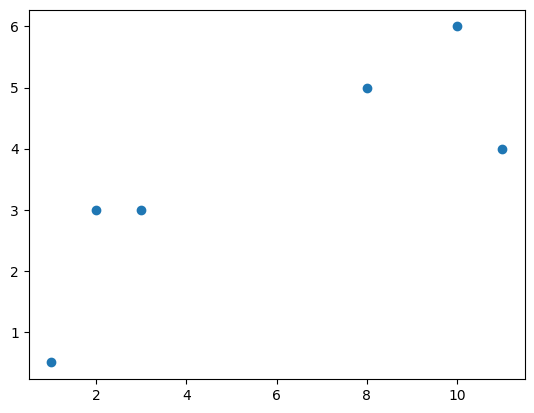

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# data

X = [[10,6], [11,4], [8,5], [3,3], [2,3], [1, 0.5]]
nX = np.array(X)

plt.scatter(nX[:,0], nX[:,1])
plt.show()

Calculate the mean of F1 and F2 to identify new center

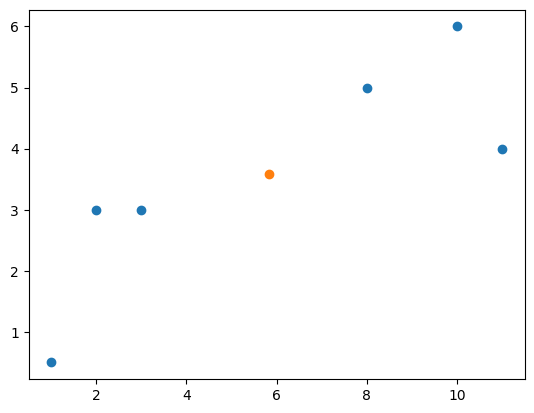

In [3]:
# mean

mD1 = np.mean(nX[:,0])
mD2 = np.mean(nX[:,1])

plt.scatter(nX[:,0], nX[:,1])
plt.scatter(mD1, mD2)
plt.show()

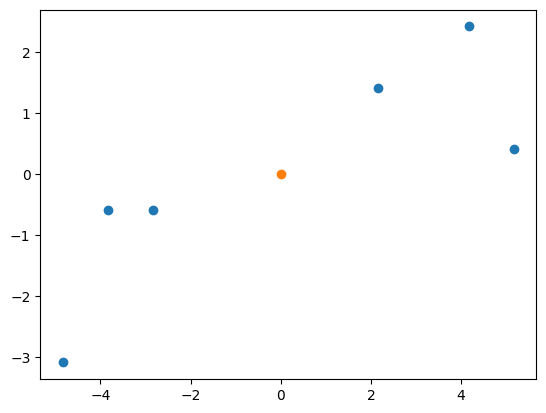

In [4]:
#create function to center data
center_function = lambda x: x - x.mean()

#apply function to original NumPy array
cX1 = center_function(nX[:,0])
cX2 = center_function(nX[:,1])

plt.scatter(cX1, cX2)
plt.scatter(cX1.mean(), cX2.mean())
plt.show()


Find the line for maximizing the distances of the projected  points:

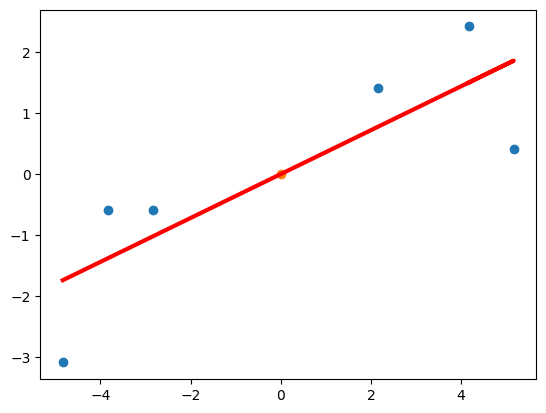

In [5]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(cX1.reshape(-1,1), cX2)
predY = model.predict(cX1.reshape(-1,1))

plt.scatter(cX1, cX2)
plt.scatter(cX1.mean(), cX2.mean())
plt.plot(cX1, predY, color="red", linewidth=3)
plt.show()

# An example of eigendecomposition with NumPy in PCA
It is time to perform eigendecomposition on the covariance matrix of a real-world dataset. Here, we use the popular Iris Dataset which can be loaded with Scikit-learn’s load_iris() function and converted into a Pandas DataFrame.

In [22]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data= pd.DataFrame(iris.data)
data.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<Figure size 1200x700 with 0 Axes>

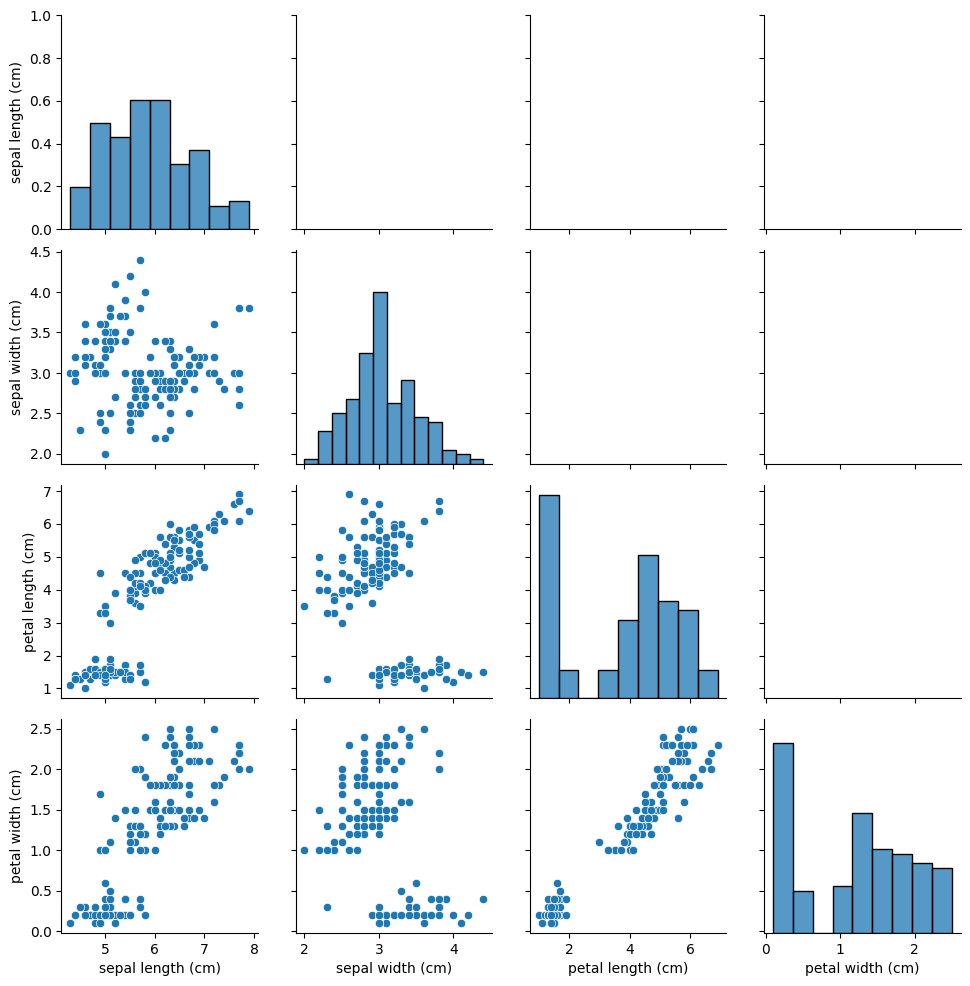

In [21]:
import seaborn as sns
plt.figure(figsize=(12,7))
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)




**Data standardization**: We standardized our data and store them in a Pandas DataFrame called data_std.

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

data_std = pd.DataFrame(sc.fit_transform(data), columns=iris.feature_names)
data_std.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Computing the covariance matrix

Compute the covariance matrix of the standardized data:

- np.cov(data_std.T) — In this case, the covariance matrix is in the form of a NumPy array.
- data_std.cov() — In this case, the covariance matrix is in the form of a Pandas DataFrame.

### Computing eigenvalues and eigenvectors

Now, we compute eigenvalues and eigenvectors of the covariance matrix by using the numpy.linalg.eig() function.

In [8]:
import numpy as np

cov_matrix = data_std.cov() #np.cov(data_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Eigenvalues")
print(eigen_vals)
print()
print("Eigenvectors as columns")
print(eigen_vecs)

Eigenvalues
[2.93808505 0.9201649  0.14774182 0.02085386]

Eigenvectors as columns
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


There is a total of 4 eigenpairs. This is because the Iris dataset has 4 variables. The eigenvalues are real numbers. This is because the covariance matrix is symmetric

#### Computing the sum of eigenvalues

Let’s compute the sum of eigenvalues

In [9]:
np.sum(eigen_vals)

4.026845637583896

Do our eigenpairs satisfy the Ax = λx equation?

In [10]:
A = data_std.cov()
x = eigen_vecs[:, 0] # First eigenvector

LHS = np.dot(A, x) # Ax
print(LHS)

[ 1.53093597 -0.79136569  1.70530304  1.65959654]


In [11]:
lambda_eig = eigen_vals[0] # First eigenvalue
x = eigen_vecs[:, 0] # First eigenvector
RHS = lambda_eig * x # λx
print(RHS)

[ 1.53093597 -0.79136569  1.70530304  1.65959654]


Because of LHS = RHS, the first eigenpair satisfies the Ax = λx equation. Likewise, we can prove that the other 3 eigenpairs satisfy the same equation.

[]

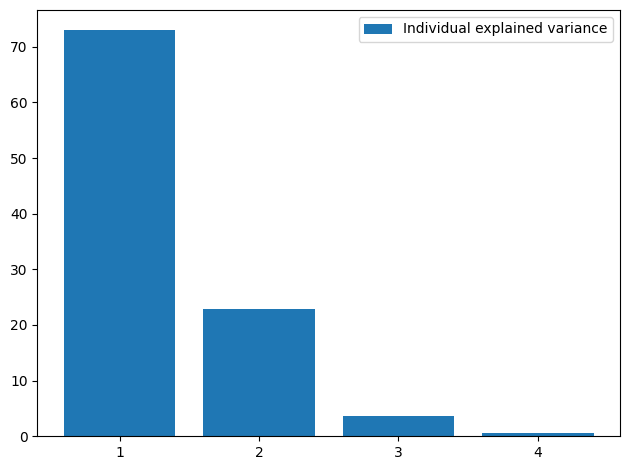

In [12]:
exp_var = []

for i in eigen_vals:
  var = (i / np.sum(eigen_vals)) * 100
  exp_var.append(var)

cum_exp_var = np.cumsum(exp_var)

plt.bar(range(1, 5), exp_var, align='center',
        label='Individual explained variance')


plt.xticks(ticks=[1, 2, 3, 4])
plt.legend(loc='best')
plt.tight_layout()

plt.plot()

The variance captured by the first two components

We can see that the first two components capture most of the variance in the original dataset. Let’s compute the amount of variance explained by the first two components. To compute this, we get the ratio (fraction) between the sum of the first two eigenvalues and the sum of all eigenvalues.

In [13]:
(eigen_vals[0] + eigen_vals[1]) / np.sum(eigen_vals)

0.9581320720000164

#### Data transformation

Now, we transform data. The eigenvectors represent the directions of maximum variance. Principal components (transformed data) are obtained by calculating the matrix product between the standardized data (data_std) and the eigenvector matrix (eigen_vecs).

In [14]:
np.dot(data_std, eigen_vecs)
pd.DataFrame(np.dot(data_std, eigen_vecs)[0:5, 0:2],
             columns=['PC1', 'PC2'])

,PC1,PC2
0,-2.264703,-0.480027
1,-2.080961,0.674134
2,-2.364229,0.341908
3,-2.299384,0.597395
4,-2.389842,-0.646835


## Performing PCA with Scikit-learn

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(data_std)
print(pca.explained_variance_)

pca = PCA(n_components=2)
data_pca = pd.DataFrame(pca.fit_transform(data_std), 
             columns=['PC1', 'PC2'])

data_pca.head()

[2.93808505 0.9201649  0.14774182 0.02085386]


,PC1,PC2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


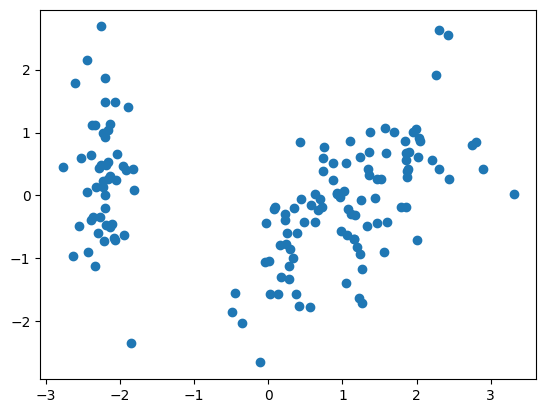

In [19]:
plt.scatter(data_pca['PC1'], data_pca['PC2'])